# Comparison Plots

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.express as px

In [2]:
game_data = pd.read_csv("../data/games_df.csv")

In [3]:
game_data.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,Action Force,2600,1982,Action,CPG Products,"$500,000","$30,000",$0,"$10,000","$540,000"
1,2,Adventures of Tron,2600,1981,Action,Mattel Interactive,"$630,000","$30,000",$0,"$10,000","$670,000"
2,3,Air Raid,2600,1981,Action,Men-A-Vision,"$720,000","$40,000",$0,"$10,000","$770,000"
3,5,Airlock,2600,1981,Action,Data Age,"$360,000","$20,000",$0,$0,"$390,000"
4,6,Alien,2600,1981,Action,20th Century Fox Video Games,"$740,000","$40,000",$0,"$10,000","$790,000"


## Games per Year by Platform 

In [188]:
platform_and_year = game_data.groupby(["Platform","Year"], as_index=False).count()
games_by_year = platform_and_year[["Platform", "Year", "Name"]].rename(columns={"Name": "Games per Platform"})
games_by_year

,Platform,Year,Games per Platform
0,2600,1980,9
1,2600,1981,46
2,2600,1982,36
3,2600,1983,11
4,2600,1984,1
...,...,...,...
57,SNES,1995,54
58,SNES,1996,30
59,SNES,1997,4
60,SNES,1998,2


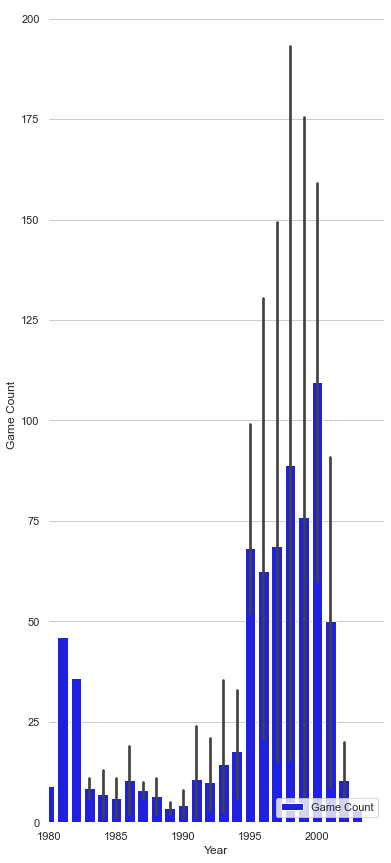

In [99]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the games per year
sns.set_color_codes("pastel")
sns.barplot(x="Year", y="Game Count", data=games_by_year,
            label="Game Count", color="blue")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="Game Count",
       xlabel="Year", xticks=[0,5,10,15,20,25])
sns.despine(left=True, bottom=True)

<AxesSubplot:xlabel='Year', ylabel='Platform'>

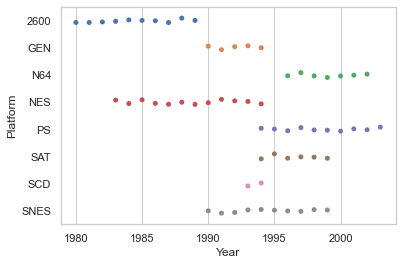

In [65]:
sns.stripplot(data=games_by_year, x="Year", y="Platform")

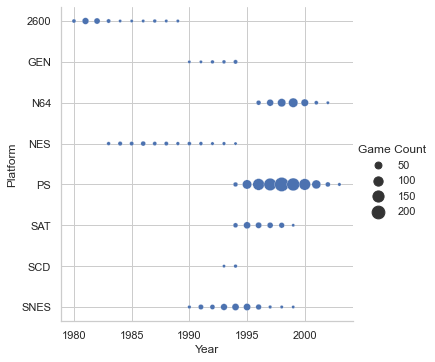

In [66]:
sns.relplot(
    data=games_by_year, x="Year", y="Platform",size="Game Count",
    palette=["b", "r"], sizes=(10, 200)
)

## Game Count By Genre

In [78]:
genres = game_data.groupby("Genre", as_index=False).count()
genre_count = genres[["Genre", "Name"]].rename(columns={"Name": "Game Count"})
genre_count

,Genre,Game Count
0,Action,277
1,Adventure,105
2,Fighting,203
3,Misc,136
4,Platform,170
5,Puzzle,84
6,Racing,228
7,Role-Playing,186
8,Shooter,182
9,Simulation,87


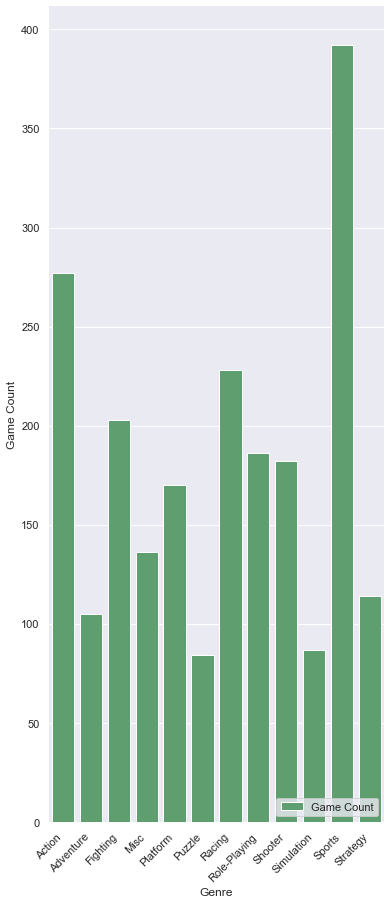

In [110]:
sns.set_theme(style="darkgrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the games per year
sns.barplot(x="Genre", y="Game Count", data=genre_count,
            label="Game Count", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Game Count", xlabel="Genre")
plt.xticks(rotation=45, ha='right')
sns.despine(left=True, bottom=True)

In [187]:
genre_year = game_data.groupby(["Genre", "Year"], as_index=False).count()
genre_by_year = genre_year[["Genre", "Year", "Platform"]].rename(columns={"Platform": "Number of Genres"})
genre_by_year

,Genre,Year,Number of Genres
0,Action,1980,1
1,Action,1981,25
2,Action,1982,18
3,Action,1983,7
4,Action,1984,1
...,...,...,...
205,Strategy,1997,18
206,Strategy,1998,28
207,Strategy,1999,23
208,Strategy,2000,7


<AxesSubplot:xlabel='Year', ylabel='Genre'>

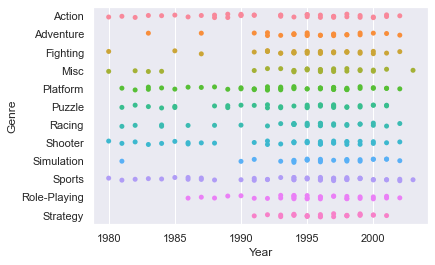

In [117]:
sns.stripplot(data=genre_by_year, x="Year", y="Genre")

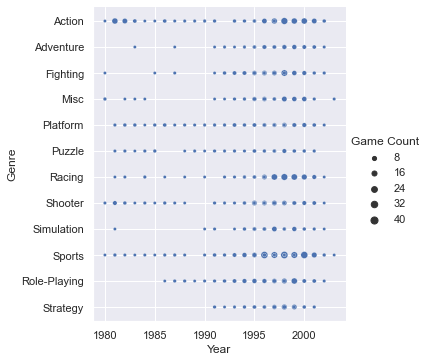

In [118]:
sns.relplot(
    data=genre_by_year, x="Year", y="Genre",size="Game Count",
    palette=["b", "r"], sizes=(10, 50)
)

## Animated Bubble Chart

In [190]:
genre_platform = games_by_year.merge(genre_by_year, how='inner', on="Year")
genre_platform

,Platform,Year,Games per Platform,Genre,Number of Genres
0,2600,1980,9,Action,1
1,2600,1980,9,Fighting,1
2,2600,1980,9,Misc,4
3,2600,1980,9,Shooter,2
4,2600,1980,9,Sports,1
...,...,...,...,...,...
602,SNES,1995,54,Simulation,13
603,SNES,1995,54,Sports,28
604,SNES,1995,54,Strategy,13
605,PS,2003,3,Misc,2


In [191]:
from bubbly.bubbly import bubbleplot

In [192]:
figure = bubbleplot(dataset=genre_platform, x_column="Genre Count", y_column="Platform Count", 
    bubble_column="Genre", time_column="Year", size_column="Platform Count", color_column="Platform",
    x_title="Genre Count", y_title="Platform Count", title='Video Game Popularity Over Time', x_logscale=True, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

KeyError: 'Genre Count'

In [195]:
figure = px.scatter(genre_platform, x = "Number of Genres", y = "Games per Platform", 
                    animation_frame= "Year", animation_group = "Genre",
                    hover_name="Genre", color = "Platform",
                    size = "Games per Platform",
                    range_x=[1,60], range_y=[1,200])

figure.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
figure.show()